
<h1 align="center"><font size="5">Predicting Weather Outcomes Using Various ML Algorithms: Classification with Python by Caleb Rae</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>


<hr>


# Summary


In this notebook, various classification algorithms will be used to classify weather or not there will be rain 'tommorow' using our sample dataset.

We will use various classification algorithms to create model(s) based on our training data and evaluate our model using the testing data with evaluation metrics as listed below.

Classification Algorithms:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

Evaluation Metrics:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score



# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset


In [40]:
df = pd.read_csv(r'C:\Users\crae1\Documents\GWG\ibmlab1\mlproj\Weather_Data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [41]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [42]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we can set our independent and dependent features variables.


In [43]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [44]:
df_sydney_processed = df_sydney_processed.astype(float)

In [45]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


 Now we use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)



Now we create and train a Linear Regression model called LinearReg using the training data (`X_train`, `y_train`).


In [47]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

We now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [48]:
predictions = LinearReg.predict(X_test)
predictions

array([ 1.31837666e-01,  2.76184976e-01,  9.78188813e-01,  2.87457049e-01,
        1.32413983e-01,  4.60464776e-01,  3.56785357e-01,  8.56409013e-01,
        6.75011694e-01,  3.82469296e-02,  4.77451086e-03,  2.81215012e-01,
        3.39082420e-01,  7.80925155e-02,  6.25942945e-02,  5.64438164e-01,
       -6.15522265e-02,  5.24162114e-01,  1.53691232e-01,  3.59700620e-01,
        6.05329871e-02,  9.03560758e-01,  4.67318714e-01,  2.03370869e-01,
       -7.10244775e-02,  3.83878171e-01,  5.36085367e-01, -2.28936672e-02,
        6.40129626e-01, -9.56752896e-02,  3.78086269e-01,  1.20264471e-01,
       -1.81462169e-02,  5.53833842e-02,  5.63534856e-01,  1.06298536e+00,
       -6.75231218e-03,  5.14394581e-01, -8.83882046e-02,  6.91938996e-02,
        2.44745612e-02,  8.71741116e-01,  2.44666278e-01,  3.94727230e-01,
        2.67560542e-01,  4.46795344e-01, -4.75681424e-02,  1.89430654e-01,
        7.76609361e-01,  1.57759488e-01,  3.94415855e-03, -5.19683957e-02,
        2.07340419e-01, -

Below we calculate scores for our evaluation metrics of the model namely, Mean Absolute Error, Mean Squared Error and R-Squared. We can then present these scores in a tabular form.


In [49]:
from sklearn.metrics import r2_score
LinearRegression_MAE = round(np.mean(np.absolute(predictions - y_test)), 3)
LinearRegression_MSE = round(np.mean(np.square(predictions - y_test)), 3)
LinearRegression_R2 = round(r2_score(y_test, predictions), 3)

In [50]:
Report = {"Metrics":["MAE","MSE","R2"],"Result": 
    [LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}
pd.DataFrame(Report)

,Metrics,Result
0,MAE,0.256
1,MSE,0.116
2,R2,0.427


### KNN


Next, we create and train a KNN model called KNN using the training data (`X_train`, `y_train`) with the `n_neighbors` parameter set to `4`...


In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

and use the `predict` method on the testing data (`X_test`) and save it to the array `predictions`.


In [52]:
predictions = KNN.predict(X_test)
predictions

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

We can now evaluate this model as we did previously, only this time we use the metrics Accuracy Score, Jaccard Index, and F1 Score and present these scores in a tabluar form.


In [53]:
from sklearn import metrics
KNN_Accuracy_Score = round(metrics.accuracy_score(y_test, predictions), 3)

from sklearn.metrics import jaccard_score
KNN_JaccardIndex = round(jaccard_score(y_test, predictions, pos_label=0), 3)

from sklearn.metrics import f1_score
KNN_F1_Score = round(f1_score(y_test, predictions, pos_label=0), 3)

In [54]:
Report2 = {"Metrics":["ACC","JAC","F1"],"Result": 
    [KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score]}
pd.DataFrame(Report2)

,Metrics,Result
0,ACC,0.818
1,JAC,0.790
2,F1,0.883


Of course we can look at other n_neighbour values to see what one yields the best accuracy.

In [55]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77099237, 0.80152672, 0.82290076, 0.81832061, 0.81984733,
       0.8351145 , 0.83358779, 0.82900763, 0.8351145 ])

Plot of different n_neighbour values and their accuracy score.

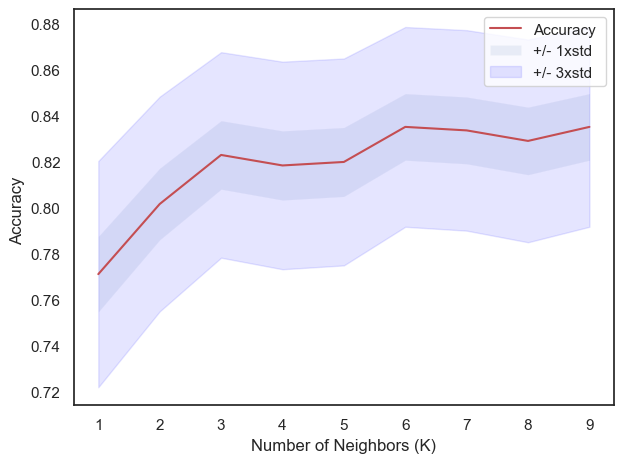

In [77]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We can see from the above visual that the highest accuracy scores are shared when a n_neighbour value of either 6 or 9 is selected. Let's train our model again, this time using n_neighbours = 6.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [58]:
predictions = KNN.predict(X_test)
predictions

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

In [59]:
from sklearn import metrics
KNN_Accuracy_Score = round(metrics.accuracy_score(y_test, predictions), 3)

from sklearn.metrics import jaccard_score
KNN_JaccardIndex = round(jaccard_score(y_test, predictions, pos_label=0), 3)

from sklearn.metrics import f1_score
KNN_F1_Score = round(f1_score(y_test, predictions, pos_label=0), 3)

In [60]:
Report2 = {"Metrics":["ACC","JAC","F1"],"Result": 
    [KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score]}
pd.DataFrame(Report2)

,Metrics,Result
0,ACC,0.835
1,JAC,0.807
2,F1,0.893


### Decision Tree


We can also train a Decision Tree model called Tree using the training data (`X_train`, `y_train`)...


In [61]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [62]:
predictions = Tree.predict(X_test)
predictions

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1.

and evaluate the model similarly to what we done with the KNN model.


In [63]:
Tree_Accuracy_Score = round(metrics.accuracy_score(y_test, predictions), 3)
Tree_JaccardIndex = round(jaccard_score(y_test, predictions, pos_label=0), 3)
Tree_F1_Score = round(f1_score(y_test, predictions, pos_label=0), 3)

In [64]:
Report3 = {"Metrics":["ACC","JAC","F1"],"Result": 
    [Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score]}
pd.DataFrame(Report3)

,Metrics,Result
0,ACC,0.773
1,JAC,0.730
2,F1,0.844


### Logistic Regression


We can continue with training a LogisticRegression model called LR using the training data (`X_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [65]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\crae1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions = LR.predict(X_test)
predictions

array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

We will use the same evaluation metrics as before but with the addition of the LogLoss metric.


In [67]:
LR_Accuracy_Score = accuracy_score(predictions, y_test)
LR_JaccardIndex = jaccard_score(predictions, y_test, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions, pos_label=0)

from sklearn.metrics import log_loss
predictions_proba = LR.predict_proba(X_test)
LR_Log_Loss = log_loss(y_test, predictions_proba)

In [68]:
Report4 = {"Metrics":["ACC","JAC","F1","LOG"],"Result": 
    [LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss]}
pd.DataFrame(Report4)

,Metrics,Result
0,ACC,0.844275
1,JAC,0.812844
2,F1,0.896761
3,LOG,0.367020


### SVM


Finally we can create and train a Support Vector Machine model called SVM using the training data (`X_train`, `y_train`)...


In [69]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC()

and use the `predict` method on the testing data (`X_test`) and save it to the array `predictions` and then continue using our evaluation metrics.


In [70]:
predictions = SVM.predict(X_test)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [71]:
SVM_Accuracy_Score = round(accuracy_score(predictions, y_test), 3)
SVM_JaccardIndex = round(jaccard_score(predictions, y_test, pos_label=0), 3)
SVM_F1_Score = round(f1_score(y_test, predictions, pos_label=0), 3)

### Report


Instead of showing the metrics for our SVM model only, we can combine our previous reports into a singular report for all our models that use Accuracy Score, Jaccard Index, F1 score and LogLoss.

\*LogLoss is only for Logistic Regression Model


In [72]:
Report5={'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,'NA'],'Tree':[Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score,'NA'],'SVM':[SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score,'NA'],'LR':[LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss]}
Rep = pd.DataFrame(data=Report5,index=['Accuracy','Jaccard_Index','F1_Score','LogLoss'])
Rep

,KNN,Tree,SVM,LR
Accuracy,0.835,0.773,0.719,0.844275
Jaccard_Index,0.807,0.73,0.719,0.812844
F1_Score,0.893,0.844,0.837,0.896761
LogLoss,NA,NA,NA,0.367020


### Visual Report

We can also show the evaluation scores visually using a grouped bar plot. To do this, we transform our report table from a wide format to a long table.

In [73]:
Report6 = {"Metrics":["ACC","JAC","F1","ACC","JAC","F1","ACC","JAC","F1","ACC","JAC","F1","LOGLOSS"],"Result": 
    [SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score,KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,
     Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score,
     LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss],"Model-Type":["SVM","SVM","SVM","KNN","KNN","KNN","TREE","TREE","TREE","LR","LR","LR","LR"]}
RepAll = pd.DataFrame(Report6)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ACC'),
  Text(1, 0, 'JAC'),
  Text(2, 0, 'F1'),
  Text(3, 0, 'LOGLOSS')])

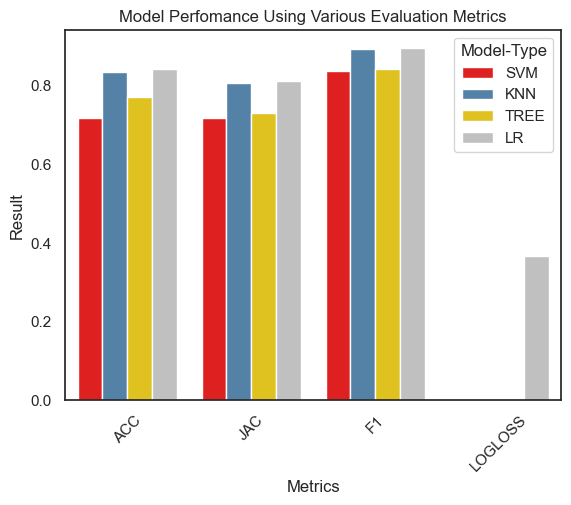

In [74]:

# set seaborn plotting aesthetics
sns.set(style='white')

# create grouped bar chart
sns.barplot(x='Metrics', y='Result', hue='Model-Type', data=RepAll, palette=['red', 'steelblue', 'gold','silver'])

plt.title('Model Perfomance Using Various Evaluation Metrics')

plt.xticks(rotation=45)


#### Thank you for viewing this project.